<a href="https://colab.research.google.com/github/tomonari-masada/course2023-intro2ml/blob/main/09_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-最近傍法 (k-nearest neighbor)
* k-近傍法とも呼ばれる
* データの分類に使える手法のひとつ
* モデルを使わない手法！（個々のデータをそのまま使う）

 * 利点：簡単
 * 欠点：すべてのデータとの類似度を計算する必要がある（計算量大）

## アルゴリズム
* ラベルを予測したいデータと最も類似したk個の訓練データを求める
* そのk個で多数決を採り、最多数のラベルを答えにする

## データセットの読み込み

* データセットを読み込むための関数をインポート

In [ ]:
from sklearn.datasets import load_digits

* digitsデータセットの読み込み

In [ ]:
digits = load_digits()

* 数字画像を可視化するための準備

In [ ]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

* インデックスが100の数字画像を可視化

In [ ]:
idx = 100
plt.imshow(digits.data[idx].reshape(8,8))
plt.title(f'class {digits.target[idx]}')
plt.show()

## 訓練データ/検証データ/テストデータに分割

* 訓練データ
 * 正解（＝目的変数の値）が分かっているとしてよいデータ
 * 入力である説明変数の値と、出力である目的変数の値とのペアを使って、モデルの学習を行う
* 検証データ
 * ハイパーパラメータを調整するために使うデータ
  * ハイパーパラメータ：人間が手動で調整しないといけないパラメータ
 * 正解が分かっているとしてよいが、モデルの学習には使わない
 * 予測と正解をつきあわせて性能を評価するためにだけ、正解を使う
 * 最も良い性能を出すハイパーパラメータの値を探る
* テストデータ
 * 正解を予測するために使うデータ
 * テストデータでの評価は最終的な評価
 * この評価結果を見てハイパーパラメータを変えてはいけない！


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.2,
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=42)

print(X_train.shape, X_valid.shape, X_test.shape)

## 問1

* 添え字0の検証データと添え字0の訓練データのユークリッド距離を求めよう。

* 添え字0の検証データと添え字1の訓練データのユークリッド距離を求めよう。

* どちらのユークリッド距離のほうが小さいか？


In [ ]:
import numpy as np

In [ ]:
print(np.linalg.norm(X_valid[0] - X_train[0]))

In [ ]:
print(np.linalg.norm(X_valid[0] - X_train[1]))

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.imshow(X_valid[0].reshape(8, 8))
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 4))
fig.add_subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(8, 8))
fig.add_subplot(1, 2, 2)
plt.imshow(X_train[1].reshape(8, 8))
plt.show()

## k-最近傍法をscikit-learnを使って実装する

* 分類器を準備する
 * ここでは最も近いもの3個を使って予測をするという設定。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

* 分類器に訓練データを渡す。

In [ ]:
neigh.fit(X_train, y_train)

* 検証データについてクラスラベルを予測する。

In [ ]:
neigh.predict(X_valid)

* 正解ラベルを見てみる。

In [ ]:
y_valid

* 正解率を調べる。
 * `score`メソッドを使えばすぐ求まる。

In [ ]:
neigh.score(X_valid, y_valid)

## kの値をいくらにすればいいか調べる
* 検証データでの分類性能を見て、ベストなkの値を探してください。

# MNISTデータセットの取得方法
* もしMNISTデータセットで同様の実験をしたい場合は・・・
* 下記の手順に沿ってデータセットを用意してください。

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


* 普通は最後の10,000件をテストデータにする。

In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

* 最初の100個を可視化

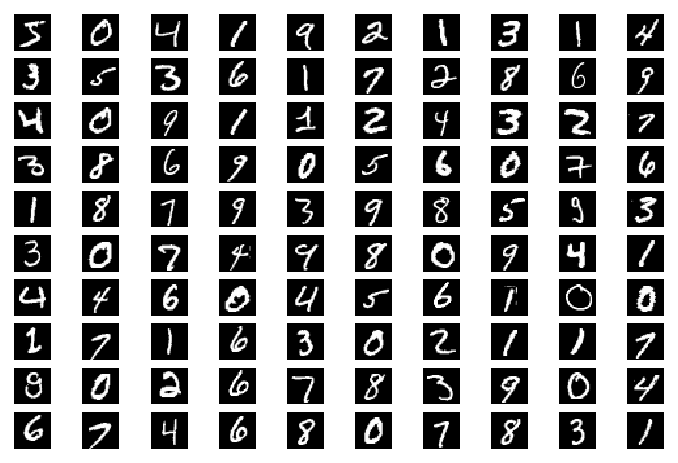

In [ ]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train, axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

* 訓練データの部分を、さらに訓練データ/検証データへと分割
 * ここのやり方は自由で良いです。
 * 普通は、検証データを5000~10000件ぐらいに設定します。

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=10000,
                                                      random_state=42)

In [ ]:
print(X_train.shape, X_valid.shape)

(50000, 784) (10000, 784)
